In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
grpc_data = pd.read_csv("~/Output/grpc_client/log_client.csv")
rabbit_data = pd.read_csv("~/Output/rabbit_client/log_client.csv")

grpc_data = grpc_data[grpc_data.Time != 'Time']['Time'].astype(float) #dropping non numbers
rabbit_data = rabbit_data[rabbit_data.Time != 'Time']['Time'].astype(float) #dropping non numbers

grpc_data_wo = pd.read_csv("~/Output/grpc_client/log_client.csv")
rabbit_data_wo = pd.read_csv("~/Output/rabbit_client/log_client.csv")

grpc_data_wo = grpc_data_wo[grpc_data_wo.Time != 'Time']['Time'].astype(float) #dropping non numbers
rabbit_data_wo = rabbit_data_wo[rabbit_data_wo.Time != 'Time']['Time'].astype(float) #dropping non numbers


In [3]:
def warmupCut(pd,tests):
    for i in range (0,tests):
        pd = pd.drop(pd.index[0+i*10000:3000+i*10000])
        pd = pd.drop(pd.index[10001+i*10000:11001+i*10000])
    return pd

def outliersCut(pd,limit):
    for i in range (0, limit):
        pd = pd.drop(pd.idxmax())
        pd = pd.drop(pd.idxmin())
    return pd

In [4]:
grpc_data = warmupCut(grpc_data, 31)
# grpc_data = outliersCut(grpc_data,10)

rabbit_data = warmupCut(rabbit_data, 31)
# rabbit_data = outliersCut(rabbit_data, 10)

# grpc_data_wo = outliersCut(grpc_data_wo, 50)
# rabbit_data_wo = outliersCut(rabbit_data_wo,50)

In [5]:
grpc_data.describe()

count    300000.000000
mean          0.390587
std           0.069293
min           0.101146
25%           0.345123
50%           0.386844
75%           0.430223
max           3.822454
Name: Time, dtype: float64

In [6]:
rabbit_data.describe()

count    300000.000000
mean          0.331903
std           0.049937
min           0.265285
25%           0.309636
50%           0.321871
75%           0.341029
max           6.531806
Name: Time, dtype: float64

In [7]:
means = []
stds = []
means.append(grpc_data.mean())
means.append(rabbit_data.mean())

stds.append(grpc_data.std())
stds.append(rabbit_data.std())

index = np.arange(len(means))

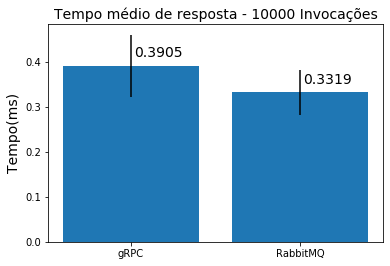

In [8]:
objects = ["gRPC", "RabbitMQ"]
plt.bar(index, means, yerr=stds)
plt.xticks(index, objects)

for a,b in zip(index, means):
    plt.text(a+0.02, b+0.02, str(b)[0:6], fontsize=14)
plt.ylabel("Tempo(ms)", fontsize=14)
plt.title("Tempo médio de resposta - 10000 Invocações", fontsize=14)
plt.savefig('fig1.png')
plt.show()

In [9]:
udp_data = pd.read_csv("~/Output/udp_client1/log_client1.csv")
tcp_data = pd.read_csv("~/Output/tcp_client1/log_client1.csv")

udp_data = udp_data[udp_data.Time != 'Time']['Time'].astype(float) #dropping non numbers
tcp_data = tcp_data[tcp_data.Time != 'Time']['Time'].astype(float) #dropping non numbers

# udp_data = outliersCut(udp_data,10)
# tcp_data = outliersCut(tcp_data,10)

In [10]:
udp_data.describe()

count    300000.000000
mean          0.059925
std           0.024280
min           0.036838
25%           0.042607
50%           0.048005
75%           0.073606
max           1.306998
Name: Time, dtype: float64

In [11]:
tcp_data.describe()

count    300000.000000
mean          0.061509
std           0.019584
min           0.043657
25%           0.050292
50%           0.053186
75%           0.061616
max           0.450883
Name: Time, dtype: float64

In [12]:
objects = ["UDP", "TCP", "gRPC", "RabbitMQ"]
means = []
stds = []
means.append(udp_data.mean())
means.append(tcp_data.mean())
means.append(grpc_data.mean())
means.append(rabbit_data.mean())

stds.append(udp_data.std())
stds.append(tcp_data.std())
stds.append(grpc_data.std())
stds.append(rabbit_data.std())

index = np.arange(len(means))


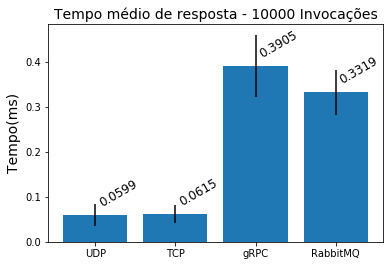

In [13]:
plt.bar(index, means, yerr=stds)
plt.xticks(index, objects)

for a,b in zip(index, means):
    plt.text(a+0.02, b+0.02, str(b)[0:6], fontsize=12, rotation=30)
plt.ylabel("Tempo(ms)", fontsize=14)
plt.title("Tempo médio de resposta - 10000 Invocações", fontsize=14)
plt.savefig('fig2.png')
plt.show()

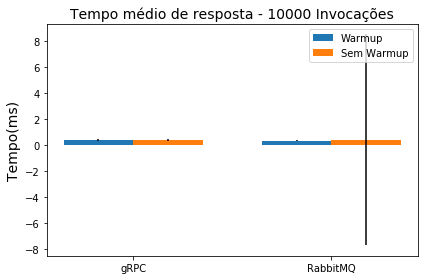

In [14]:
objects = ["gRPC", "RabbitMQ"]
means = []
stds = []

means.append(grpc_data.mean())
means.append(rabbit_data.mean())

stds.append(grpc_data.std())
stds.append(rabbit_data.std())

means_wo = []
stds_wo = []

means_wo.append(grpc_data_wo.mean())
means_wo.append(rabbit_data_wo.mean())

stds_wo.append(grpc_data_wo.std())
stds_wo.append(rabbit_data_wo.std())

index = np.arange(len(means))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(index - width/2, means, width, label='Warmup', yerr=stds)
rects2 = ax.bar(index + width/2, means_wo, width, label='Sem Warmup', yerr=stds_wo)

plt.xticks(index, objects)

plt.ylabel("Tempo(ms)", fontsize=14)
plt.title("Tempo médio de resposta - 10000 Invocações", fontsize=14)
plt.legend()
plt.savefig('fig3.png')
fig.tight_layout()
plt.show()


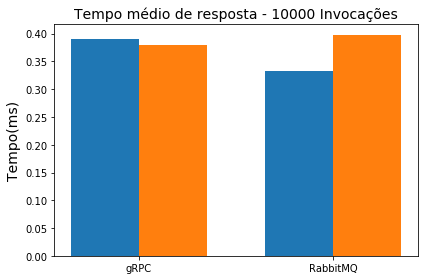

In [15]:
fig, ax = plt.subplots()
rects1 = ax.bar(index - width/2, means, width, label='Warmup')
rects2 = ax.bar(index + width/2, means_wo, width, label='Sem Warmup')

plt.xticks(index, objects)

plt.ylabel("Tempo(ms)", fontsize=14)
plt.title("Tempo médio de resposta - 10000 Invocações", fontsize=14)
# plt.legend()
plt.savefig('fig4.png')
fig.tight_layout()
plt.show()